In [1]:
# Importing Libraries
import pymongo 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 

In [6]:
# Connection to MongoDB
myclient = pymongo.MongoClient("your connection link")

In [7]:
# Database 
db = myclient["sample_airbnb"]

In [8]:
# Collection
col = db["listingsAndReviews"]

In [12]:
# Getting data from MongoDB
all_data = []
for i in col.find():
    data = dict(Listing_Id = i['_id'],
                Listing_Name = i.get('name'),
                Description = i['description'],
                Property_type = i['property_type'],
                Room_type = i['room_type'],
                Bed_type = i['bed_type'],
                Min_nights = int(i['minimum_nights']),
                Max_nights = int(i['maximum_nights']),
                Accomodates = i['accommodates'],
                Total_bedrooms = i.get('bedrooms'),
                Total_beds = i.get('beds'),
                Availability_365 = i['availability']['availability_365'],
                Price = i['price'],
                Extra_people = i['extra_people'],
                Guests_included= i['guests_included'],
                Total_reviews = int(i['number_of_reviews']),
                Review_scores = i['review_scores'].get('review_scores_rating'),
                Amenities = ', '.join(i['amenities']),
                Host_id = i['host']['host_id'],
                Host_name = i['host']['host_name'],
                Country = i['address']['country'],
                Longitude = i['address']['location']['coordinates'][0],
                Latitude = i['address']['location']['coordinates'][1],
                Neighbourhood = i['host']['host_neighbourhood'],
                Listing_count = i['host']['host_total_listings_count']
    )
    all_data.append(data)


In [13]:
# Dataframe
df = pd.DataFrame(all_data)
df

,Listing_Id,Listing_Name,Description,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Accomodates,Total_bedrooms,...,Total_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Neighbourhood,Listing_count
0,10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Apartment,Entire home/apt,Real Bed,2,1125,4,1.0,...,0,NaN,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,Brazil,-43.230750,-22.966254,Jardim Botânico,1
1,10059244,Ligne verte - à 15 min de métro du centre ville.,À 30 secondes du métro Joliette. Belle grande ...,Apartment,Entire home/apt,Real Bed,2,1125,2,0.0,...,0,NaN,"TV, Internet, Wifi, Kitchen, Free parking on p...",7140229,Caro,Canada,-73.549490,45.545480,,1
2,10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,Apartment,Private room,Real Bed,14,1125,1,1.0,...,1,100.0,"Internet, Wifi, Air conditioning, Kitchen, Buz...",11275734,Josh,United States,-73.936150,40.697910,Bushwick,1
3,10038496,Copacabana Apartment Posto 6,"The Apartment has a living room, toilet, bedro...",Apartment,Entire home/apt,Real Bed,3,75,4,1.0,...,70,98.0,"TV, Cable TV, Internet, Wifi, Air conditioning...",51530266,Ana Valéria,Brazil,-43.190849,-22.984339,Copacabana,2
4,10051164,Catete's Colonial Big Hause Room B,"Old floor, intirely reformed, destined to rece...",House,Private room,Real Bed,2,1125,8,1.0,...,1,80.0,"TV, Cable TV, Internet, Wifi, Air conditioning...",51326285,Beatriz,Brazil,-43.180157,-22.926382,Catete,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9917859,StayIN Oporto Música - Apartment,Acabamos de decorar-lo para receber os primeir...,Apartment,Entire home/apt,Real Bed,1,1125,16,8.0,...,20,89.0,"TV, Cable TV, Wifi, Kitchen, Elevator, Heating...",2296185,Manuel,Portugal,-8.606220,41.151270,,3
5551,9944044,Sanctuary Bundeena,"Relax and revitalise in our spacious, self-con...",Bed and breakfast,Private room,Real Bed,2,1125,2,1.0,...,1,100.0,"TV, Internet, Wifi, Kitchen, Free parking on p...",51104303,Sara And Scott,Australia,151.152710,-34.088290,,1
5552,9937100,Frida's Centric&Stylish Studio Apt.,Unique loft apartment with a Frida Kahlo decor...,Loft,Entire home/apt,Real Bed,31,365,4,0.0,...,133,96.0,"Internet, Wifi, Air conditioning, Kitchen, Pai...",3479346,Ewa & Pau,Spain,2.173040,41.387790,Dreta de l'Eixample,14
5553,9987200,The best suite in Copacabana (total privacy),Excellent private suite with bathroom at the A...,Aparthotel,Private room,Real Bed,3,60,3,1.0,...,90,97.0,"TV, Cable TV, Wifi, Air conditioning, Pool, Gy...",51314789,Dumont,Brazil,-43.176533,-22.961076,Copacabana,3


Data Exploration and Data Cleaning

In [21]:
df.size

138875

In [22]:
df.shape

(5555, 25)

In [16]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing_Id        5555 non-null   object 
 1   Listing_Name      5555 non-null   object 
 2   Description       5555 non-null   object 
 3   Property_type     5555 non-null   object 
 4   Room_type         5555 non-null   object 
 5   Bed_type          5555 non-null   object 
 6   Min_nights        5555 non-null   int64  
 7   Max_nights        5555 non-null   int64  
 8   Accomodates       5555 non-null   int64  
 9   Total_bedrooms    5550 non-null   float64
 10  Total_beds        5542 non-null   float64
 11  Availability_365  5555 non-null   int64  
 12  Price             5555 non-null   object 
 13  Extra_people      5555 non-null   object 
 14  Guests_included   5555 non-null   object 
 15  Total_reviews     5555 non-null   int64  
 16  Review_scores     4081 non-null   float64


In [17]:
df.columns

Index(['Listing_Id', 'Listing_Name', 'Description', 'Property_type',
       'Room_type', 'Bed_type', 'Min_nights', 'Max_nights', 'Accomodates',
       'Total_bedrooms', 'Total_beds', 'Availability_365', 'Price',
       'Extra_people', 'Guests_included', 'Total_reviews', 'Review_scores',
       'Amenities', 'Host_id', 'Host_name', 'Country', 'Longitude', 'Latitude',
       'Neighbourhood', 'Listing_count'],
      dtype='object')

In [18]:
df['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5555 entries, 0 to 5554
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
5555 non-null   object
dtypes: object(1)
memory usage: 43.5+ KB


In [19]:
df['Longitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5555 entries, 0 to 5554
Series name: Longitude
Non-Null Count  Dtype  
--------------  -----  
5555 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


In [20]:
df['Latitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5555 entries, 0 to 5554
Series name: Latitude
Non-Null Count  Dtype  
--------------  -----  
5555 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


In [23]:
# Handling null values
df.isnull().sum()

Listing_Id             0
Listing_Name           0
Description            0
Property_type          0
Room_type              0
Bed_type               0
Min_nights             0
Max_nights             0
Accomodates            0
Total_bedrooms         5
Total_beds            13
Availability_365       0
Price                  0
Extra_people           0
Guests_included        0
Total_reviews          0
Review_scores       1474
Amenities              0
Host_id                0
Host_name              0
Country                0
Longitude              0
Latitude               0
Neighbourhood          0
Listing_count          0
dtype: int64

In [24]:
# Filling Total bedrooms with mode
df.Total_bedrooms.fillna(df.Total_bedrooms.mode()[0],inplace=True)

In [25]:
df.Total_beds.value_counts()

Total_beds
1.0     2700
2.0     1381
3.0      657
4.0      385
5.0      166
6.0      109
7.0       43
0.0       29
8.0       28
10.0      16
9.0       11
12.0       5
11.0       3
15.0       2
14.0       2
16.0       2
25.0       1
13.0       1
18.0       1
Name: count, dtype: int64

In [26]:
# Filling Total beds with median because data has outliers
df.Total_beds.fillna(df.Total_beds.median(),inplace=True)

In [27]:
df.Review_scores.value_counts()

Review_scores
100.0    982
98.0     291
96.0     286
97.0     281
95.0     259
93.0     244
94.0     223
90.0     213
99.0     188
80.0     167
92.0     158
89.0     113
91.0     112
87.0      97
88.0      77
85.0      55
86.0      48
84.0      43
60.0      41
83.0      39
70.0      25
82.0      19
20.0      16
81.0      12
78.0      11
75.0      11
40.0      10
76.0       9
73.0       8
79.0       8
74.0       5
72.0       5
67.0       5
71.0       4
77.0       4
65.0       3
68.0       3
69.0       2
50.0       2
53.0       1
64.0       1
Name: count, dtype: int64

In [28]:
df.Review_scores.fillna(df.Review_scores.median(),inplace=True)

In [29]:
# Filling Empty values in Description and Amenities columns
df.Description.replace(to_replace='',value='No Description Provided',inplace=True)
df.Amenities.replace(to_replace='',value='Not Available',inplace=True)

In [31]:
df.isnull().sum()

Listing_Id          0
Listing_Name        0
Description         0
Property_type       0
Room_type           0
Bed_type            0
Min_nights          0
Max_nights          0
Accomodates         0
Total_bedrooms      0
Total_beds          0
Availability_365    0
Price               0
Extra_people        0
Guests_included     0
Total_reviews       0
Review_scores       0
Amenities           0
Host_id             0
Host_name           0
Country             0
Longitude           0
Latitude            0
Neighbourhood       0
Listing_count       0
dtype: int64

In [32]:
# Changing certain columns to its relevant data types
df.Price = df.Price.astype(str).astype(float)
df.Extra_people = df.Extra_people.astype(str).astype(float)
df.Guests_included = df.Guests_included.astype(str).astype(float)
df.Review_scores = df.Review_scores.astype('Int64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing_Id        5555 non-null   object 
 1   Listing_Name      5555 non-null   object 
 2   Description       5555 non-null   object 
 3   Property_type     5555 non-null   object 
 4   Room_type         5555 non-null   object 
 5   Bed_type          5555 non-null   object 
 6   Min_nights        5555 non-null   int64  
 7   Max_nights        5555 non-null   int64  
 8   Accomodates       5555 non-null   int64  
 9   Total_bedrooms    5555 non-null   float64
 10  Total_beds        5555 non-null   float64
 11  Availability_365  5555 non-null   int64  
 12  Price             5555 non-null   float64
 13  Extra_people      5555 non-null   float64
 14  Guests_included   5555 non-null   float64
 15  Total_reviews     5555 non-null   int64  
 16  Review_scores     5555 non-null   Int64  


In [34]:
# Checking duplicates
df[df.duplicated()]

,Listing_Id,Listing_Name,Description,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Accomodates,Total_bedrooms,...,Total_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Neighbourhood,Listing_count


In [37]:
df.drop(columns=['Description'],inplace=True)

In [38]:
df.head()

,Listing_Id,Listing_Name,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,...,Total_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Neighbourhood,Listing_count
0,10009999,Horto flat with small garden,Apartment,Entire home/apt,Real Bed,2,1125,4,1.0,2.0,...,0,95,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,Brazil,-43.230750,-22.966254,Jardim Botânico,1
1,10059244,Ligne verte - à 15 min de métro du centre ville.,Apartment,Entire home/apt,Real Bed,2,1125,2,0.0,1.0,...,0,95,"TV, Internet, Wifi, Kitchen, Free parking on p...",7140229,Caro,Canada,-73.549490,45.545480,,1
2,10021707,Private Room in Bushwick,Apartment,Private room,Real Bed,14,1125,1,1.0,1.0,...,1,100,"Internet, Wifi, Air conditioning, Kitchen, Buz...",11275734,Josh,United States,-73.936150,40.697910,Bushwick,1
3,10038496,Copacabana Apartment Posto 6,Apartment,Entire home/apt,Real Bed,3,75,4,1.0,3.0,...,70,98,"TV, Cable TV, Internet, Wifi, Air conditioning...",51530266,Ana Valéria,Brazil,-43.190849,-22.984339,Copacabana,2
4,10051164,Catete's Colonial Big Hause Room B,House,Private room,Real Bed,2,1125,8,1.0,8.0,...,1,80,"TV, Cable TV, Internet, Wifi, Air conditioning...",51326285,Beatriz,Brazil,-43.180157,-22.926382,Catete,5


In [39]:
df.sample(n=5)

,Listing_Id,Listing_Name,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,...,Total_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Neighbourhood,Listing_count
246,11568230,Apartamento en casco antiguo,Apartment,Entire home/apt,Real Bed,31,1125,4,3.0,4.0,...,7,93,"TV, Internet, Wifi, Air conditioning, Kitchen,...",22076771,Luis,Spain,2.178770,41.379030,El Gòtic,15
967,15100883,New york Multi-unit building,Apartment,Private room,Real Bed,3,1125,2,1.0,1.0,...,1,60,"Wifi, Air conditioning, Kitchen, Free street p...",95623284,Pablo,United States,-73.897130,40.865330,,1
4351,32433031,Amazing Duplex with Big Terrace *4BD,Apartment,Entire home/apt,Real Bed,2,1125,10,4.0,4.0,...,0,95,"Wifi, Air conditioning, Kitchen, Elevator, Was...",32037490,SweetInn,Spain,2.143690,41.376840,Dreta de l'Eixample,74
931,15097549,WONDERFUL APARTMENTE IN COPACABANA!,Apartment,Entire home/apt,Real Bed,2,1125,6,2.0,3.0,...,12,98,"TV, Cable TV, Internet, Wifi, Air conditioning...",59200131,Thiago,Brazil,-43.178918,-22.964291,,1
2762,24474335,Belle chambre lumineuse sur le plateau,Apartment,Private room,Real Bed,4,11,2,1.0,1.0,...,1,95,"TV, Wifi, Kitchen, Smoking allowed, Heating, S...",6909299,Clémentine,Canada,-73.564570,45.532360,Le Plateau,1


In [40]:
# Replacing empty values
df.Neighbourhood.replace(to_replace='',value='Not Available',inplace=True)

In [43]:
df

,Listing_Id,Listing_Name,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,...,Total_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Neighbourhood,Listing_count
0,10009999,Horto flat with small garden,Apartment,Entire home/apt,Real Bed,2,1125,4,1.0,2.0,...,0,95,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,Brazil,-43.230750,-22.966254,Jardim Botânico,1
1,10059244,Ligne verte - à 15 min de métro du centre ville.,Apartment,Entire home/apt,Real Bed,2,1125,2,0.0,1.0,...,0,95,"TV, Internet, Wifi, Kitchen, Free parking on p...",7140229,Caro,Canada,-73.549490,45.545480,Not Available,1
2,10021707,Private Room in Bushwick,Apartment,Private room,Real Bed,14,1125,1,1.0,1.0,...,1,100,"Internet, Wifi, Air conditioning, Kitchen, Buz...",11275734,Josh,United States,-73.936150,40.697910,Bushwick,1
3,10038496,Copacabana Apartment Posto 6,Apartment,Entire home/apt,Real Bed,3,75,4,1.0,3.0,...,70,98,"TV, Cable TV, Internet, Wifi, Air conditioning...",51530266,Ana Valéria,Brazil,-43.190849,-22.984339,Copacabana,2
4,10051164,Catete's Colonial Big Hause Room B,House,Private room,Real Bed,2,1125,8,1.0,8.0,...,1,80,"TV, Cable TV, Internet, Wifi, Air conditioning...",51326285,Beatriz,Brazil,-43.180157,-22.926382,Catete,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9917859,StayIN Oporto Música - Apartment,Apartment,Entire home/apt,Real Bed,1,1125,16,8.0,8.0,...,20,89,"TV, Cable TV, Wifi, Kitchen, Elevator, Heating...",2296185,Manuel,Portugal,-8.606220,41.151270,Not Available,3
5551,9944044,Sanctuary Bundeena,Bed and breakfast,Private room,Real Bed,2,1125,2,1.0,1.0,...,1,100,"TV, Internet, Wifi, Kitchen, Free parking on p...",51104303,Sara And Scott,Australia,151.152710,-34.088290,Not Available,1
5552,9937100,Frida's Centric&Stylish Studio Apt.,Loft,Entire home/apt,Real Bed,31,365,4,0.0,2.0,...,133,96,"Internet, Wifi, Air conditioning, Kitchen, Pai...",3479346,Ewa & Pau,Spain,2.173040,41.387790,Dreta de l'Eixample,14
5553,9987200,The best suite in Copacabana (total privacy),Aparthotel,Private room,Real Bed,3,60,3,1.0,3.0,...,90,97,"TV, Cable TV, Wifi, Air conditioning, Pool, Gy...",51314789,Dumont,Brazil,-43.176533,-22.961076,Copacabana,3


In [44]:
df.to_csv("Airbnb.csv",index=False)

checking unique values for variables

In [47]:
df["Neighbourhood"].nunique()

447

In [48]:
df["Listing_Id"].nunique()

5555

In [49]:
df["Host_name"].nunique()

3140

In [51]:
df["Listing_Name"].nunique()

5538

In [3]:
df

,Listing_Id,Listing_Name,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,...,Total_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Neighbourhood,Listing_count
0,10009999,Horto flat with small garden,Apartment,Entire home/apt,Real Bed,2,1125,4,1.0,2.0,...,0,95,"Wifi, Wheelchair accessible, Kitchen, Free par...",1282196,Ynaie,Brazil,-43.230750,-22.966254,Jardim Botânico,1
1,10059244,Ligne verte - à 15 min de métro du centre ville.,Apartment,Entire home/apt,Real Bed,2,1125,2,0.0,1.0,...,0,95,"TV, Internet, Wifi, Kitchen, Free parking on p...",7140229,Caro,Canada,-73.549490,45.545480,Not Available,1
2,10021707,Private Room in Bushwick,Apartment,Private room,Real Bed,14,1125,1,1.0,1.0,...,1,100,"Internet, Wifi, Air conditioning, Kitchen, Buz...",11275734,Josh,United States,-73.936150,40.697910,Bushwick,1
3,10038496,Copacabana Apartment Posto 6,Apartment,Entire home/apt,Real Bed,3,75,4,1.0,3.0,...,70,98,"TV, Cable TV, Internet, Wifi, Air conditioning...",51530266,Ana Valéria,Brazil,-43.190849,-22.984339,Copacabana,2
4,10051164,Catete's Colonial Big Hause Room B,House,Private room,Real Bed,2,1125,8,1.0,8.0,...,1,80,"TV, Cable TV, Internet, Wifi, Air conditioning...",51326285,Beatriz,Brazil,-43.180157,-22.926382,Catete,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9917859,StayIN Oporto Música - Apartment,Apartment,Entire home/apt,Real Bed,1,1125,16,8.0,8.0,...,20,89,"TV, Cable TV, Wifi, Kitchen, Elevator, Heating...",2296185,Manuel,Portugal,-8.606220,41.151270,Not Available,3
5551,9944044,Sanctuary Bundeena,Bed and breakfast,Private room,Real Bed,2,1125,2,1.0,1.0,...,1,100,"TV, Internet, Wifi, Kitchen, Free parking on p...",51104303,Sara And Scott,Australia,151.152710,-34.088290,Not Available,1
5552,9937100,Frida's Centric&Stylish Studio Apt.,Loft,Entire home/apt,Real Bed,31,365,4,0.0,2.0,...,133,96,"Internet, Wifi, Air conditioning, Kitchen, Pai...",3479346,Ewa & Pau,Spain,2.173040,41.387790,Dreta de l'Eixample,14
5553,9987200,The best suite in Copacabana (total privacy),Aparthotel,Private room,Real Bed,3,60,3,1.0,3.0,...,90,97,"TV, Cable TV, Wifi, Air conditioning, Pool, Gy...",51314789,Dumont,Brazil,-43.176533,-22.961076,Copacabana,3


Describing the data and finding outliers

In [6]:
# Describe the dataframe
df.describe()

,Listing_Id,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,Availability_365,Price,Extra_people,Guests_included,Total_reviews,Review_scores,Host_id,Longitude,Latitude,Listing_count
count,5.555000e+03,5555.000000,5.555000e+03,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5.555000e+03,5555.000000,5555.000000,5555.000000
mean,1.664386e+07,5.564356,1.382776e+06,3.505851,1.411341,2.071287,173.105671,278.766157,22.791899,1.747435,27.606481,93.603600,6.512138e+07,-6.623240,22.061230,14.405761
std,9.622558e+06,22.613861,5.256920e+07,2.297019,1.041547,1.617767,139.841893,842.215531,69.331511,1.487352,49.798376,7.779357,6.816258e+07,90.525974,28.092112,65.848868
min,1.170800e+04,1.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,20.000000,2.787000e+03,-159.678690,-34.088290,0.000000
25%,8.376039e+06,1.000000,5.900000e+01,2.000000,1.000000,1.000000,17.000000,70.000000,0.000000,1.000000,1.000000,93.000000,1.024978e+07,-73.599530,20.724390,1.000000
50%,1.711345e+07,2.000000,1.125000e+03,3.000000,1.000000,2.000000,171.000000,129.000000,0.000000,1.000000,5.000000,95.000000,3.725685e+07,-8.611420,40.727130,2.000000
75%,2.461229e+07,3.000000,1.125000e+03,4.000000,2.000000,3.000000,317.000000,280.000000,20.000000,2.000000,32.000000,98.000000,1.046962e+08,29.019605,41.162755,6.000000
max,3.295874e+07,1250.000000,2.147484e+09,16.000000,20.000000,25.000000,365.000000,48842.000000,2346.000000,16.000000,533.000000,100.000000,2.477517e+08,151.338980,45.665630,1198.000000


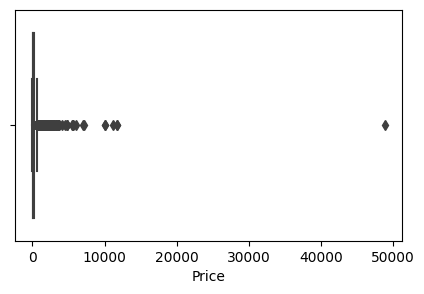

In [12]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df["Price"])
plt.show()

In [4]:
# Using IQR technique to remove outliers
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        

  return lower_range,upper_range
     

In [5]:
lower_bound,upper_bound = iqr_technique(df['Price'])

df_new = df[(df.Price>lower_bound) & (df.Price<upper_bound)]

(4981, 24)


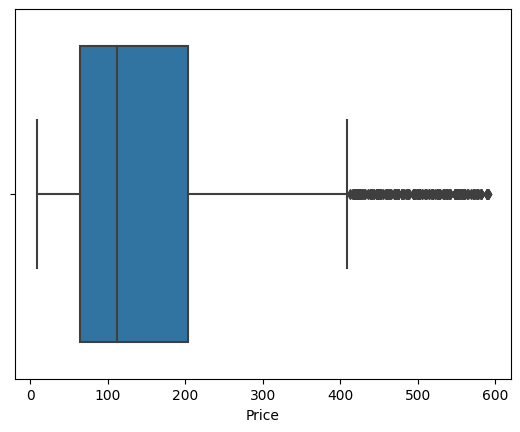

In [6]:
sns.boxplot(x=df_new["Price"])
print(df_new.shape)

In [16]:
df_new.describe()

,Listing_Id,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,Availability_365,Price,Extra_people,Guests_included,Total_reviews,Review_scores,Host_id,Longitude,Latitude,Listing_count
count,4.981000e+03,4981.000000,4.981000e+03,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4.981000e+03,4981.000000,4981.000000,4981.000000
mean,1.662390e+07,5.663923,1.110899e+06,3.320016,1.341096,1.965670,173.854045,156.732584,18.850231,1.707087,29.228067,93.573379,6.562795e+07,-12.924996,23.322692,14.549890
std,9.592133e+06,23.514515,4.644248e+07,2.107069,0.958525,1.503352,138.630169,127.034706,57.712064,1.376483,51.140736,7.879877,6.832024e+07,88.818249,28.223508,68.582051
min,1.170800e+04,1.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,20.000000,2.787000e+03,-159.678690,-34.088290,0.000000
25%,8.356824e+06,1.000000,4.500000e+01,2.000000,1.000000,1.000000,20.000000,64.000000,0.000000,1.000000,1.000000,93.000000,1.023719e+07,-73.629860,20.784840,1.000000
50%,1.712479e+07,2.000000,1.125000e+03,3.000000,1.000000,1.000000,174.000000,112.000000,0.000000,1.000000,6.000000,95.000000,3.777620e+07,-8.618200,40.801420,2.000000
75%,2.451381e+07,3.000000,1.125000e+03,4.000000,2.000000,2.000000,316.000000,203.000000,20.000000,2.000000,35.000000,98.000000,1.058477e+08,28.982350,41.372840,6.000000
max,3.295874e+07,1250.000000,2.147484e+09,16.000000,20.000000,25.000000,365.000000,591.000000,2346.000000,16.000000,533.000000,100.000000,2.477517e+08,151.338980,45.665630,1198.000000


Exploratory Data Analysis

Price Distribution in Airbnb

c:\Users\MITHUNA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

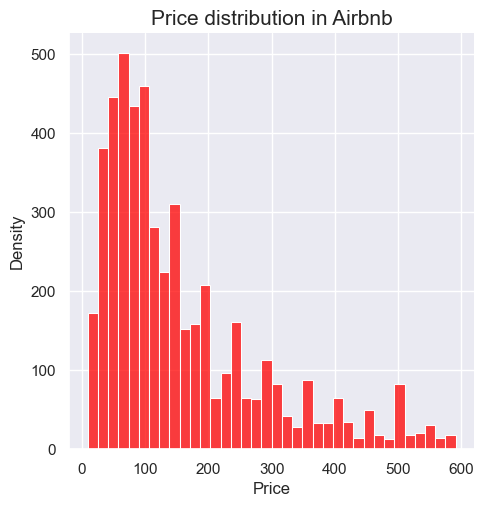

In [30]:
# Distribution of airbnb price range 
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.displot(df_new["Price"],color=("red"))
plt.xlabel("Price",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.title("Price distribution in Airbnb",fontsize=15)
plt.show()

Top 10 Property types

Text(0.5, 1.0, 'Top 10 Property types available')

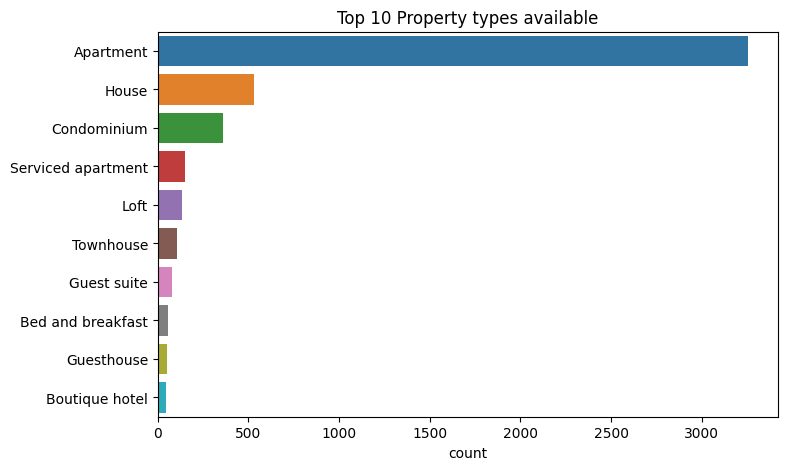

In [18]:
# Top 10 property types
plt.figure(figsize= (8,5))
ax = sns.countplot(data=df_new,y=df_new["Property_type"].values,order=df_new["Property_type"].value_counts().index[:10])
ax.set_title("Top 10 Property types available")

Total listings in each room type

Text(0.5, 1.0, 'Total Listings in each room type')

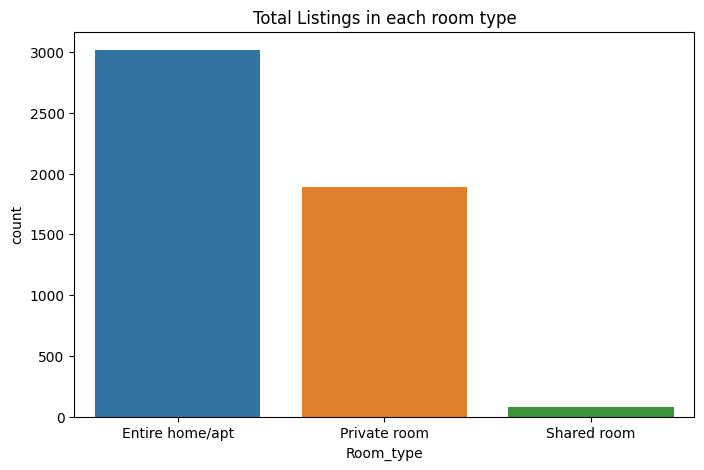

In [23]:
# Total listings in each room type
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_new,x=df_new["Room_type"])
ax.set_title("Total Listings in each room type")

In [25]:
df_new.Host_name.value_counts()

Maria      32
David      24
Ana        19
Jov        18
Sarah      18
           ..
Linsay      1
Clément     1
锦鸿          1
Nyree       1
Dumont      1
Name: Host_name, Length: 2913, dtype: int64

Top 10 hosts with highest number of listings

Text(0.5, 1.0, 'Top 10 hosts with highest number of listings')

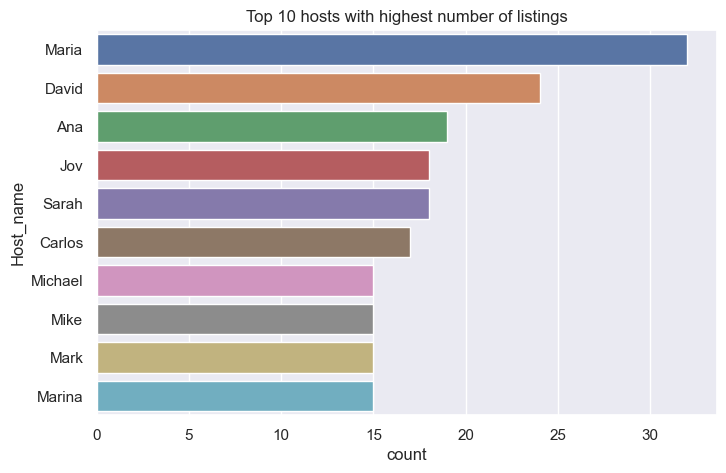

In [32]:
# Top 10 hosts with highest number of listings
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_new,y=df_new["Host_name"],order=df_new["Host_name"].value_counts().index[:10])
ax.set_title("Top 10 hosts with highest number of listings")

Average review scores for each room type

In [38]:
# Average review scores for each room type
df1 = df_new.groupby("Room_type",as_index=False)["Review_scores"].mean().sort_values(by="Review_scores")
fig = px.bar(data_frame=df1,x="Room_type",y="Review_scores",color="Review_scores")
fig.show()

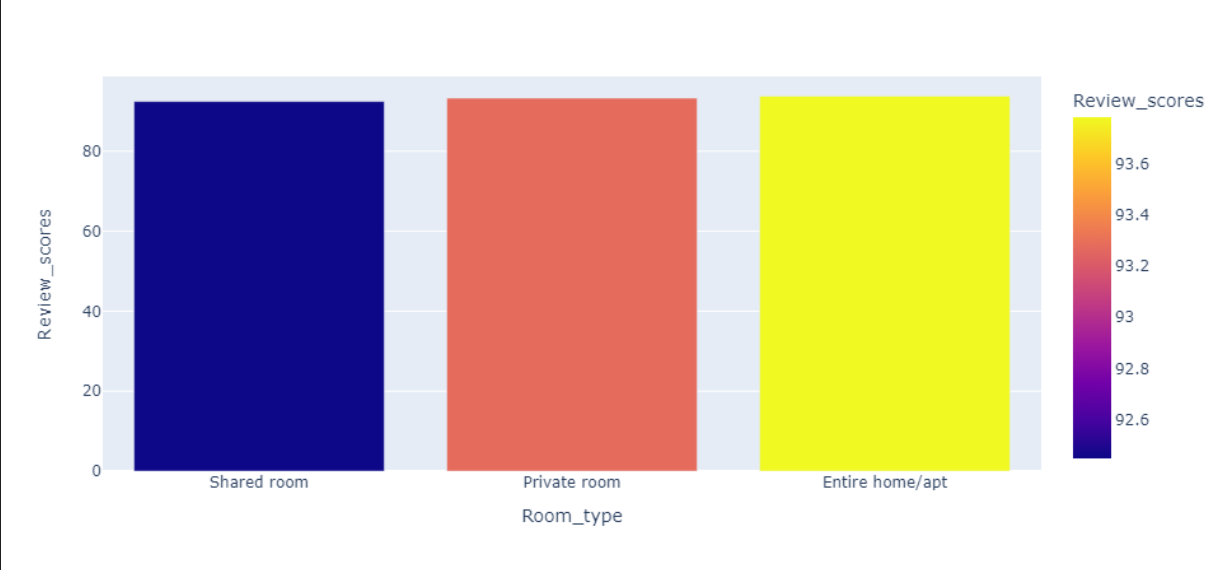

Average Prices for each room type

In [39]:
# Average Prices for each room type
df2 = df_new.groupby('Room_type',as_index=False)['Price'].mean().sort_values(by='Price')
fig = px.bar(data_frame=df2,x='Room_type',y='Price',color='Price')
fig.show()

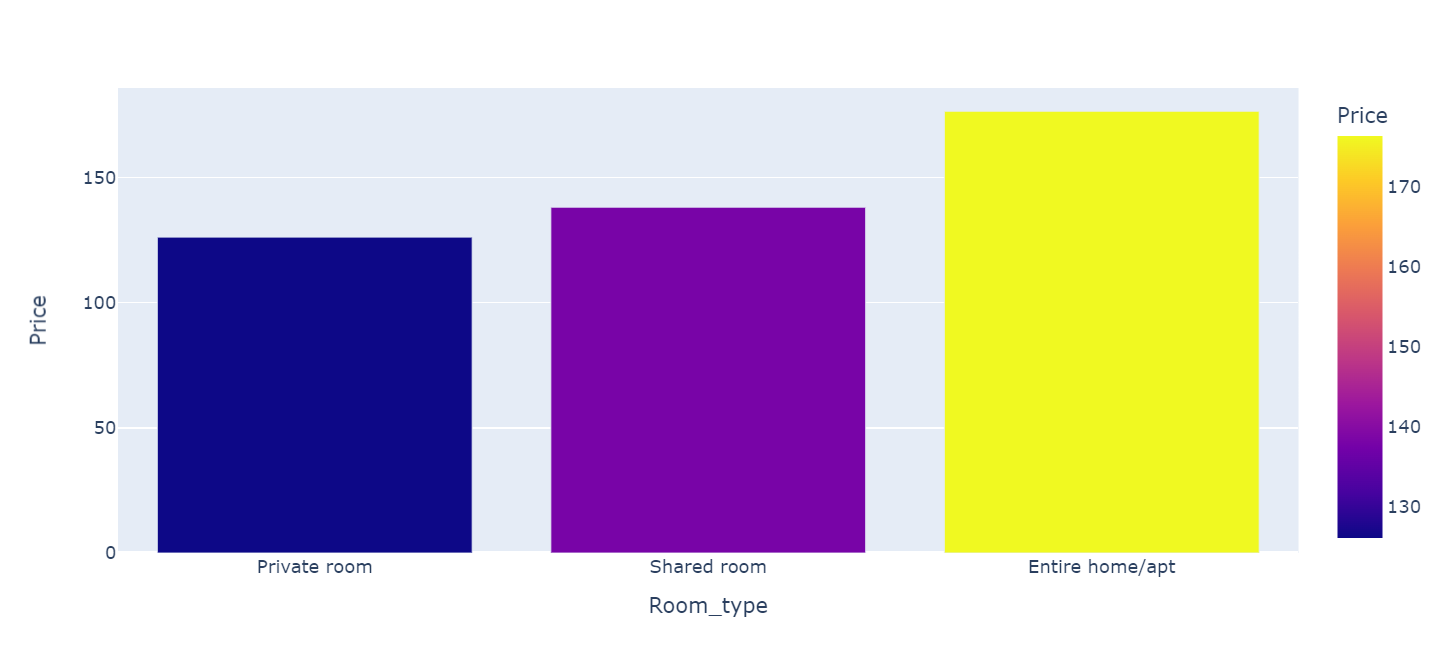

Distribution of Prices for each room type

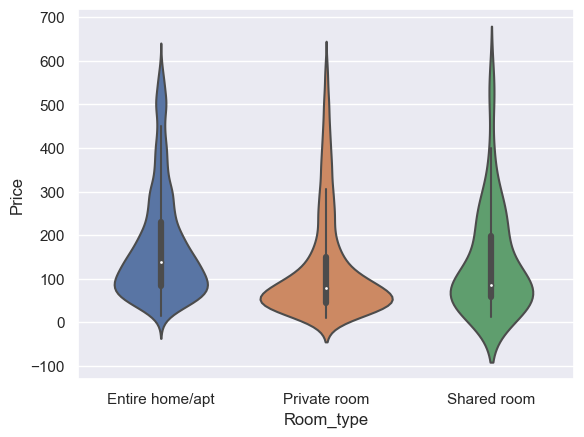

In [41]:
# Prices for each room type
ax= sns.violinplot(data=df_new,x="Room_type",y='Price')     

Top 10 Neighbourhoods with highest number of listings

In [43]:
# Top 10 Neighbourhoods with highest number of listings
Top_Neighbourhoods = df_new['Neighbourhood'].value_counts()[1:11].reset_index()
Top_Neighbourhoods.columns = ['Top_Neighbourhoods', 'Listing_Counts']
Top_Neighbourhoods

,Top_Neighbourhoods,Listing_Counts
0,Le Plateau,123
1,Copacabana,103
2,Waikiki,76
3,Downtown Montreal,72
4,Dreta de l'Eixample,66
5,Mong Kok,64
6,Williamsburg,61
7,Island of Hawaiʻi,54
8,Kihei/Wailea,49
9,Taksim,48


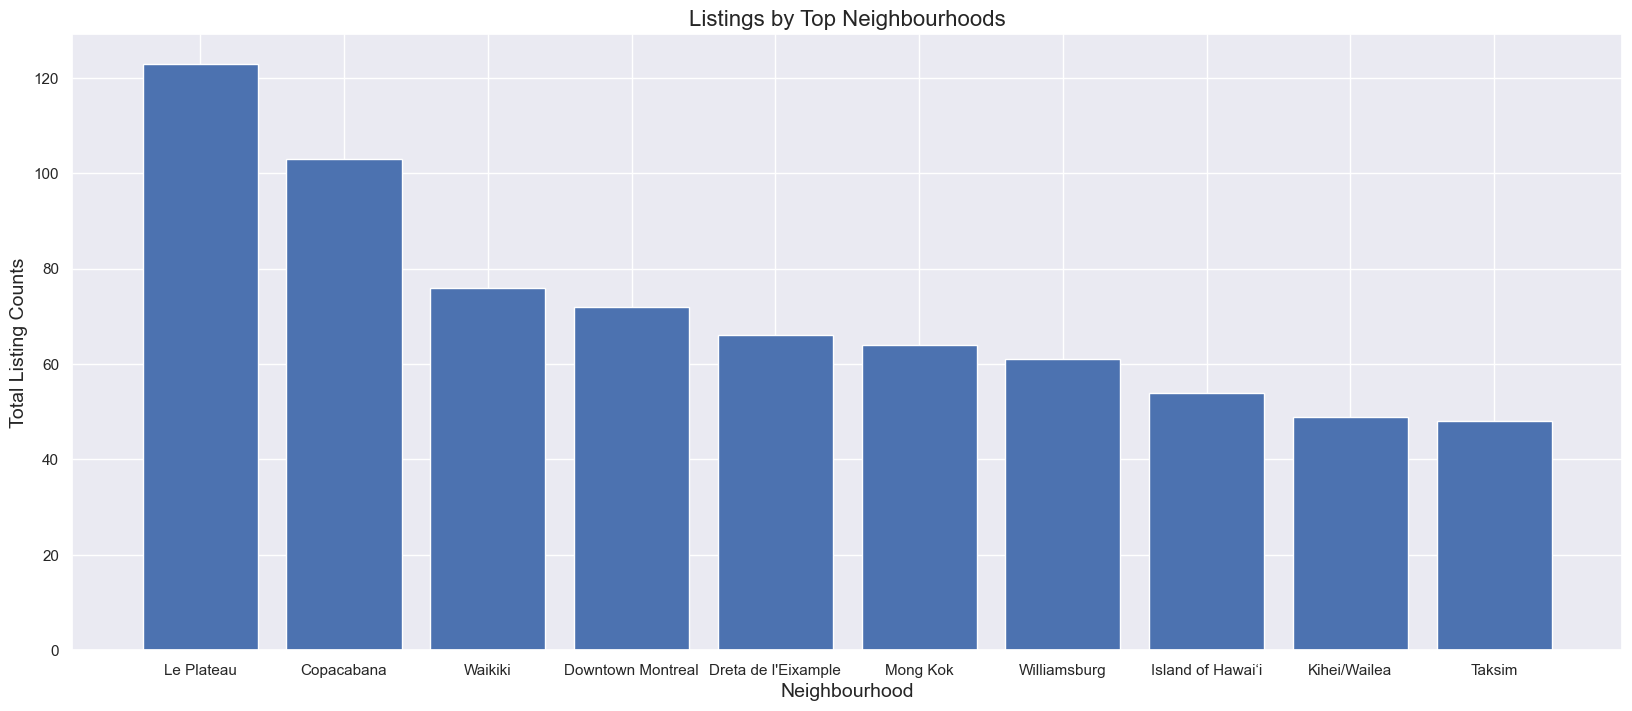

In [56]:
plt.figure(figsize=(20,8))
plt.bar(Top_Neighbourhoods["Top_Neighbourhoods"],Top_Neighbourhoods["Listing_Counts"])
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Total Listing Counts', fontsize=14)
plt.title('Listings by Top Neighbourhoods', fontsize=16)
plt.show()

Average listing price in each country

In [57]:
# Average listing price in each country
Top_neighbourhood_price = df_new.groupby("Country",as_index=False)["Price"].mean()

In [58]:
Top_neighbourhood_price

,Country,Price
0,Australia,158.017271
1,Brazil,231.901709
2,Canada,91.275272
3,China,375.470588
4,Hong Kong,364.022293
5,Portugal,69.181982
6,Spain,82.489533
7,Turkey,198.439799
8,United States,162.730185


In [61]:
fig = px.scatter(data_frame=Top_neighbourhood_price,
           x='Country',y='Price',
           color='Country',
           size='Price',
           opacity=1,
           title='Average Listing Price in each Countries')
fig.show()

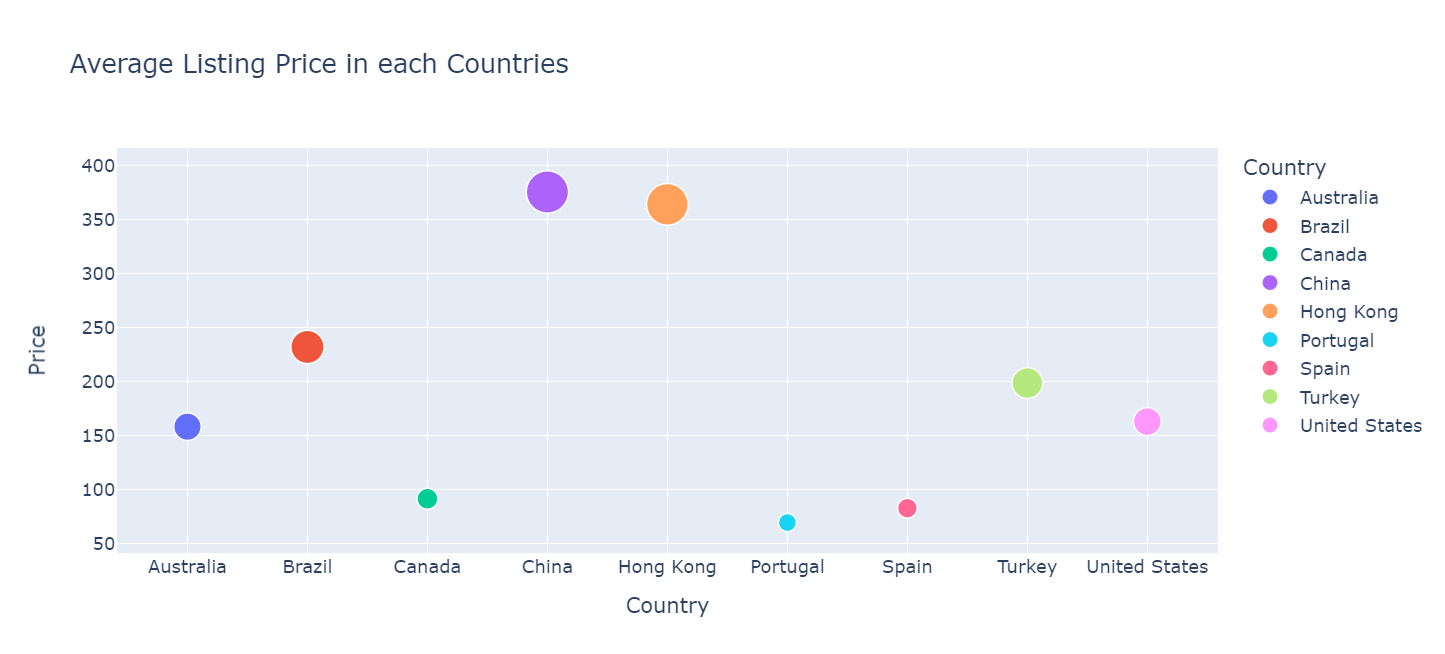

Correlation

In [67]:
# Correlation 
corr = df_new.corr()
corr

C:\Users\MITHUNA\AppData\Local\Temp\ipykernel_23032\2685224230.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Listing_Id,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,Availability_365,Price,Extra_people,Guests_included,Total_reviews,Review_scores,Host_id,Longitude,Latitude,Listing_count
Listing_Id,1.000000,-0.008896,-0.023680,0.012347,-0.002861,0.002299,-0.043124,-0.041177,-0.036586,-0.038437,-0.378831,0.002926,0.625513,0.139757,0.055190,0.053869
Min_nights,-0.008896,1.000000,-0.003952,-0.018462,0.012998,-0.017896,0.048678,-0.029390,-0.027045,-0.021772,-0.061385,-0.037805,-0.027273,-0.004671,0.041394,0.020773
Max_nights,-0.023680,-0.003952,1.000000,0.002654,-0.008501,0.021705,0.000078,0.005624,0.000456,-0.001659,0.013286,-0.026311,-0.009096,-0.005650,0.015773,-0.004645
Accomodates,0.012347,-0.018462,0.002654,1.000000,0.712696,0.816466,0.114702,0.273149,0.039101,0.548675,0.045772,-0.025300,0.008816,-0.139434,-0.012216,0.082714
Total_bedrooms,-0.002861,0.012998,-0.008501,0.712696,1.000000,0.713099,0.054822,0.204128,0.009781,0.452724,-0.041789,-0.016807,0.019654,-0.023986,-0.005879,0.043308
Total_beds,0.002299,-0.017896,0.021705,0.816466,0.713099,1.000000,0.118425,0.234995,0.057933,0.468197,0.010886,-0.025069,0.018965,-0.043581,-0.005905,0.055834
Availability_365,-0.043124,0.048678,0.000078,0.114702,0.054822,0.118425,1.000000,0.089322,0.048201,0.079507,0.076863,-0.030745,0.019317,-0.065834,0.103952,0.064822
Price,-0.041177,-0.029390,0.005624,0.273149,0.204128,0.234995,0.089322,1.000000,0.167401,0.177844,-0.096480,0.021503,-0.036457,0.147357,-0.236317,0.037443
Extra_people,-0.036586,-0.027045,0.000456,0.039101,0.009781,0.057933,0.048201,0.167401,1.000000,0.106010,0.013364,0.016039,-0.022736,0.083380,-0.072812,-0.028953
Guests_included,-0.038437,-0.021772,-0.001659,0.548675,0.452724,0.468197,0.079507,0.177844,0.106010,1.000000,0.092222,0.004268,-0.033283,-0.127092,0.004735,0.124175


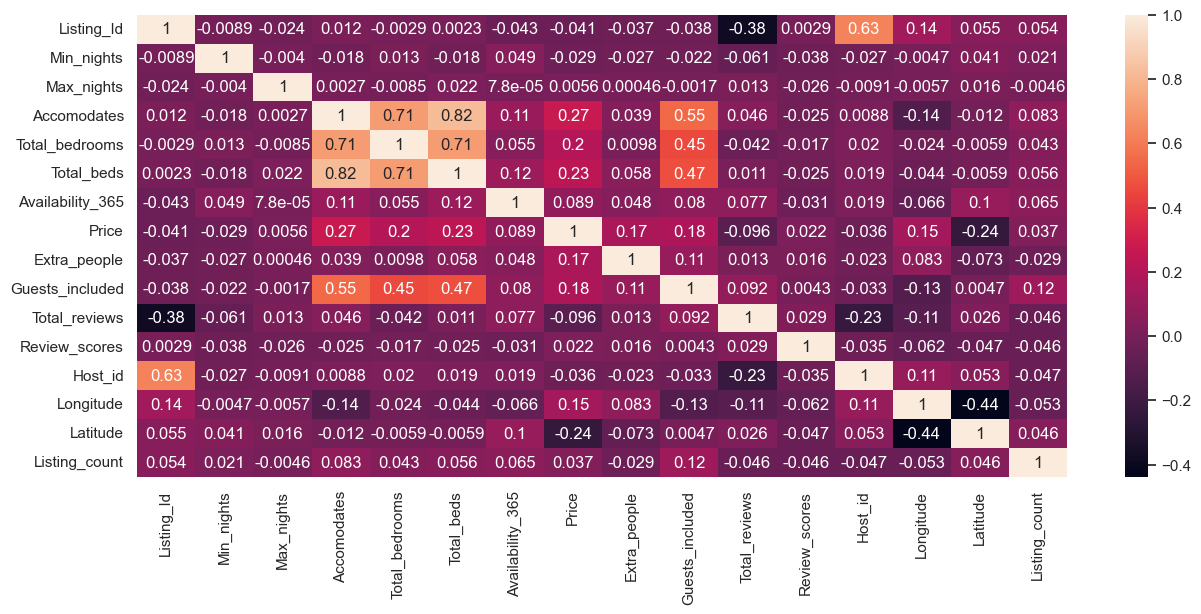

In [80]:
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)
plt.show()

Top Neighbourhood with highest review scores

In [12]:
# Top Neighbourhood with highest review scores
df5 = df_new.groupby("Neighbourhood",as_index=False)["Review_scores"].mean().sort_values(by="Review_scores")

In [19]:
review_df = df5[-10:]

In [20]:
review_df

,Neighbourhood,Review_scores
376,Times Square/Theatre District,100.0
378,Todos os Santos,100.0
380,Torre Baró,100.0
74,Cosme Velho,100.0
68,Claremont,100.0
65,Choi Hung,100.0
392,Vaucluse/Watsons Bay,100.0
49,Canterbury,100.0
352,South Coogee,100.0
348,Silverwater/Newington,100.0


Average review scores of countries

In [33]:
# Average review scores of countries
df6 = df_new.groupby("Country",as_index=False)["Review_scores"].mean().sort_values(by="Review_scores")

In [27]:
df6

,Country,Review_scores
3,China,91.588235
4,Hong Kong,91.684713
6,Spain,91.938808
2,Canada,93.348367
7,Turkey,93.461538
0,Australia,93.637306
5,Portugal,93.915315
8,United States,94.346543
1,Brazil,95.089744


In [30]:
fig = px.scatter(data_frame=df6,
           x='Country',y='Review_scores',
           color='Country',
           size='Review_scores',
           opacity=1,
           title='Average Review scores in each Countries')
fig.show()

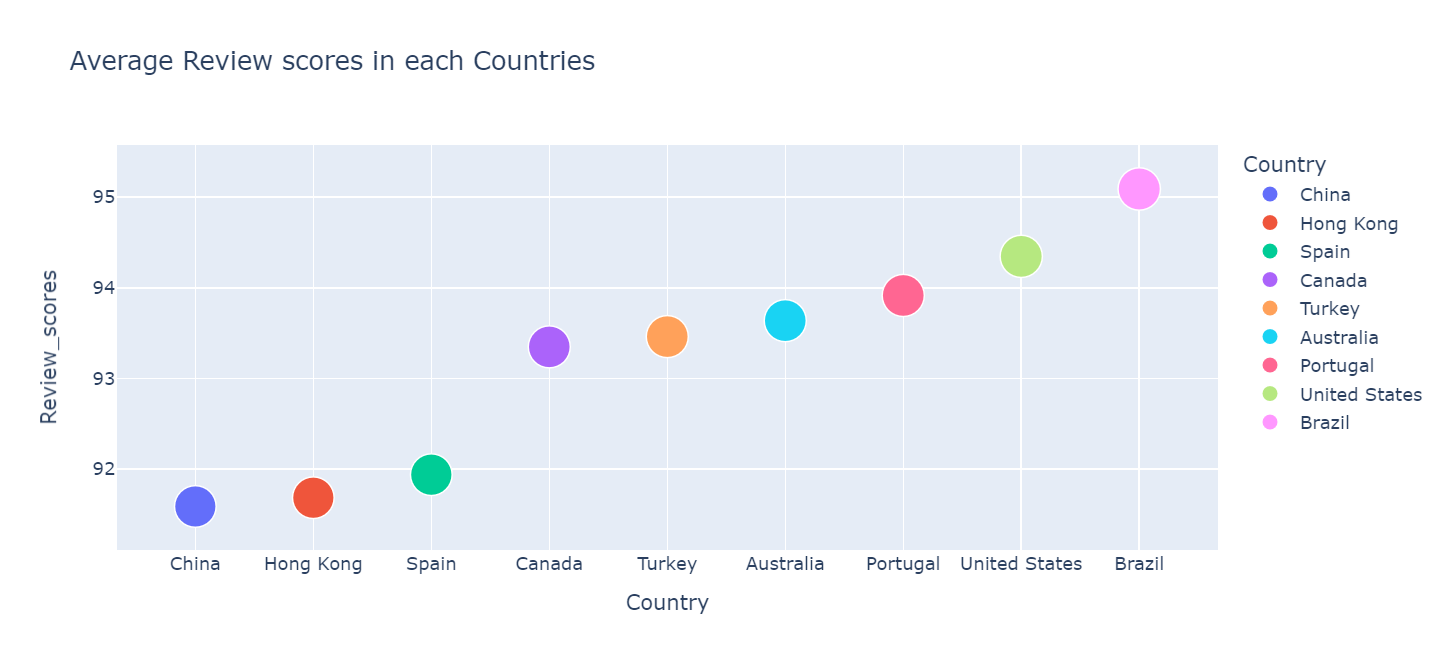

Average Prices for Number of beds

In [35]:
# Average Prices for Number of beds
df5 = df_new.groupby("Total_beds",as_index=False)["Price"].mean()

In [36]:
df5

,Total_beds,Price
0,0.0,153.620690
1,1.0,133.601896
2,2.0,157.498816
3,3.0,189.673179
4,4.0,204.019481
5,5.0,223.280992
6,6.0,255.024390
7,7.0,265.000000
8,8.0,240.800000
9,9.0,231.000000


In [45]:
fig = px.bar(df5,x=df5["Total_beds"],y=df5["Price"],title="Average Prices for Number of beds")
fig.show()

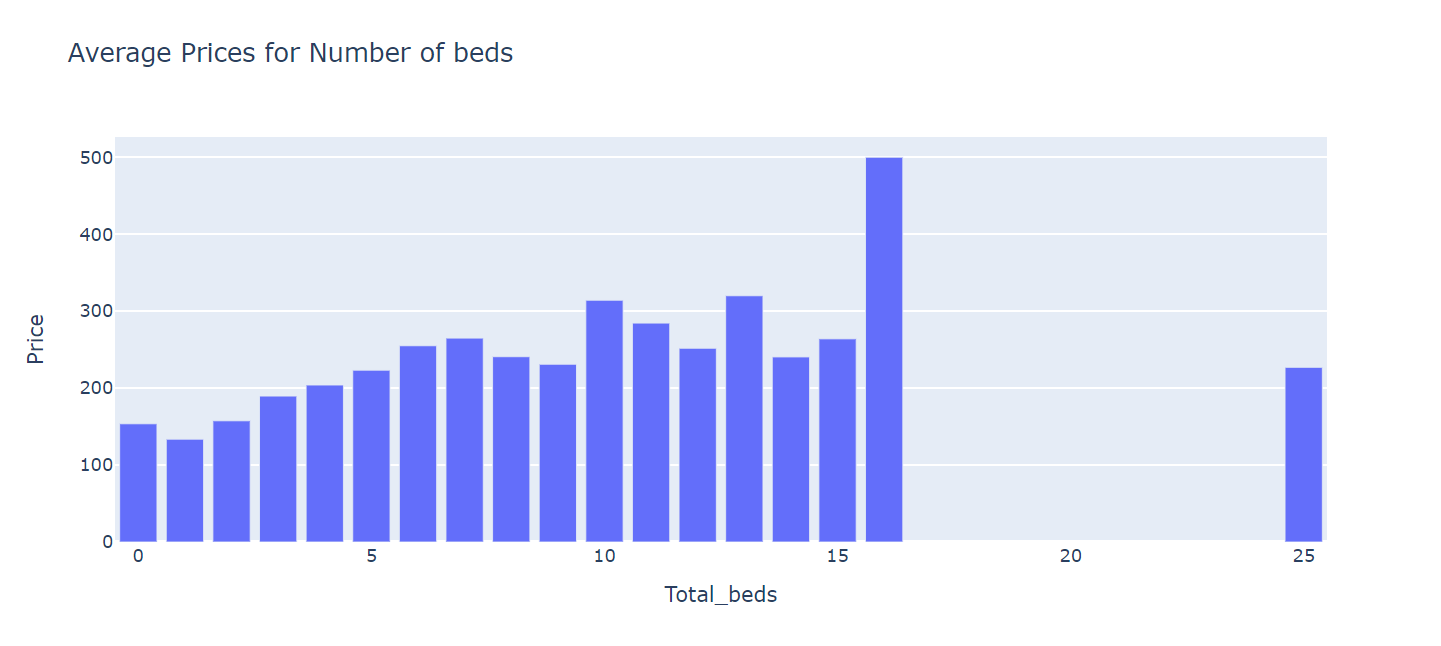